In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cosine
from utils import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_dir = "/media/arjun/Data/eluvio/data/"

In [3]:
data_train = makesimfeaturedf(data_dir)
data_train['cast_dp'] = data_train['cast_dp'].fillna(0)
data_train['place_dp'] = data_train['place_dp'].fillna(0)
data_train['action_dp'] = data_train['action_dp'].fillna(0)
data_train['audio_dp'] = data_train['audio_dp'].fillna(0)

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [4]:
data_train

,place_dp,cast_dp,action_dp,audio_dp,boundary_truth
0,0.578903,0.000000,0.000000,0.917746,0
1,0.741456,0.000000,0.000000,0.945748,0
2,0.860872,0.000000,0.000000,0.528213,0
3,0.727043,0.000000,0.000000,0.653595,0
4,0.456156,0.000000,0.000000,0.705958,1
...,...,...,...,...,...
105972,0.762393,0.759129,0.820332,0.479482,1
105973,0.586763,0.396452,0.655677,0.953961,1
105974,0.546400,0.575942,0.814876,0.874159,1
105975,0.736786,0.641870,0.911810,0.810694,0


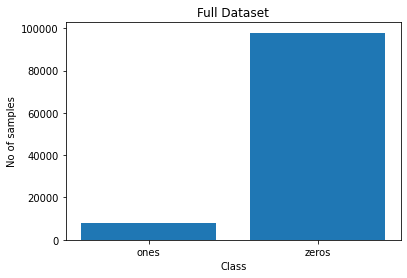

In [5]:
Y = data_train['boundary_truth']
X = data_train.drop(columns=['boundary_truth'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


imbal(Y,'Full Dataset')

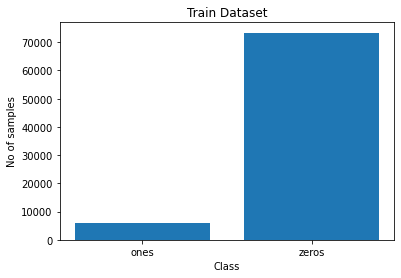

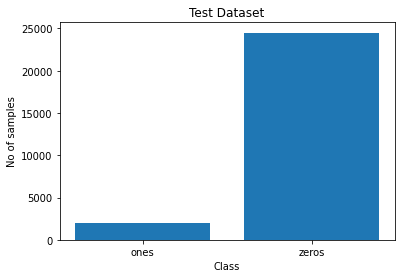

Test accuract is :  0.9235327420267975
# of IMDB IDs: 64
Scores: {
    "AP": 0.4418872028438688,
    "mAP": 0.4564401595678161,
    "Miou": 0.45414800530021754,
    "Precision": 0.2761656092479825,
    "Recall": 0.7473442326299846,
    "F1": 0.39309552999275693
}


In [10]:
imbal(y_train,'Train Dataset')
imbal(y_test,'Test Dataset')
clf1 = LogisticRegression(random_state=0).fit(x_train, y_train)
print("Test accuract is : ",clf1.score(x_test, y_test))


In [9]:
generate_predictions_dir_LR(clf1,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr1/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# Coarse predictions given

In [16]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/data/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.4418872028438688,
    "mAP": 0.4564401595678161,
    "Miou": 0.45414800530021754,
    "Precision": 0.2761656092479825,
    "Recall": 0.7473442326299846,
    "F1": 0.39309552999275693
}


# Logistic Regression Without sampling

In [15]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr1/"

# of IMDB IDs: 64
evaluate_sceneseg.py:144: RuntimeWarning: invalid value encountered in double_scalars
  fscore_dict[imdb_id] = 2 * p * r / (p + r)
evaluate_sceneseg.py:129: RuntimeWarning: invalid value encountered in long_scalars
  precision = tps / tp_fp.sum()
Scores: {
    "AP": 0.2126327936883878,
    "mAP": 0.2418608964186658,
    "Miou": 0.18686685067470163,
    "Precision": 0.44165217353921704,
    "Recall": 0.02186105353727604,
    "F1": NaN
}


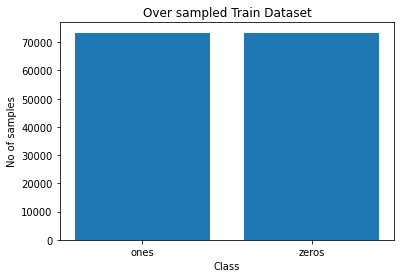

Test accuract is :  0.7034912247593885


In [13]:
X1_resampled, y1_resampled = SMOTE(random_state=123).fit_resample(x_train, y_train)
imbal(y1_resampled,'Over sampled Train Dataset')
clf2 = LogisticRegression(random_state=0).fit(X1_resampled, y1_resampled)
print("Test accuract is : ",clf2.score(x_test, y_test))


In [14]:
generate_predictions_dir_LR(clf2,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr2/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# Logistic Regression Over sampling

In [17]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr2/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.2121780933221831,
    "mAP": 0.24128090359135826,
    "Miou": 0.38064790002763804,
    "Precision": 0.1765852162060513,
    "Recall": 0.6858896694863511,
    "F1": 0.27014731291767263
}


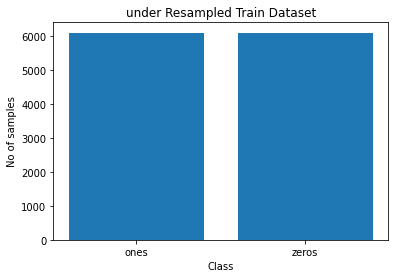

Test accuract is :  0.7079071522928855


In [18]:
X2_resampled, y2_resampled = RandomUnderSampler(random_state=123).fit_resample(x_train, y_train)
imbal(y2_resampled,'under Resampled Train Dataset')
clf3 = LogisticRegression(random_state=0).fit(X2_resampled, y2_resampled)
print("Test accuract is : ",clf3.score(x_test, y_test))


In [21]:
generate_predictions_dir_LR(clf3,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr3/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# Logistic Regression Under sampling

In [22]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr3/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.21257122817045881,
    "mAP": 0.24183656372314555,
    "Miou": 0.38071177447343973,
    "Precision": 0.17816985698845705,
    "Recall": 0.6793178434327689,
    "F1": 0.2713115067115557
}


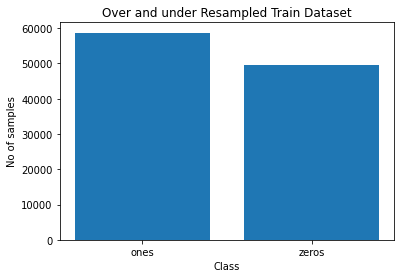

Test accuract is :  0.6277033402528779


In [23]:
X3_resampled, y3_resampled = SMOTEENN(random_state=123).fit_resample(x_train, y_train)
imbal(y3_resampled,'Over and under Resampled Train Dataset')
clf4 = LogisticRegression(random_state=0).fit(X3_resampled, y3_resampled)
print("Test accuract is : ",clf4.score(x_test, y_test))

In [24]:
generate_predictions_dir_LR(clf4,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr4/')

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

In [25]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr4/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.2117013452115986,
    "mAP": 0.24030158074611727,
    "Miou": 0.37270684932885734,
    "Precision": 0.15656395379671198,
    "Recall": 0.777032480549124,
    "F1": 0.252676197325659
}


# Undersampling in entire dataset

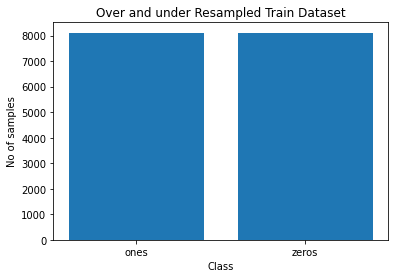

Test accuract is :  0.7083706842050633


In [31]:
X5_resampled, y5_resampled = RandomUnderSampler(random_state=123).fit_resample(X, Y)
imbal(y5_resampled,'Over and under Resampled Train Dataset')
clf5 = LogisticRegression(random_state=0).fit(X5_resampled, y5_resampled)
print("Test accuract is : ",clf5.score(X, Y))

In [32]:
generate_predictions_dir_LR(clf5,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr5/')

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

In [33]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr5/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.21235605650551823,
    "mAP": 0.24180799164398292,
    "Miou": 0.3809475352427029,
    "Precision": 0.17813000252038305,
    "Recall": 0.6811385264926133,
    "F1": 0.27137259733251956
}
